# Final Project
# "Classifying The Brain on Music"

Michael Casey, https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2017.01179/full



#### Your objective is to classify fMRI brain images taken while listening to music in five different genres: label 0=Ambient Music, 1=Country Music, 2=Heavy Metal, 3=Rock 'n Roll, 4=Classical Symphonic. The data consists of train_data.csv,  train_labels.csv, and test_data.csv, for a one-person subset of a larger 20-subject study, linked above.

#### The training data (train_data.csv) consist of 160 event-related brain images (trials), corresponding to twenty 6-second music clips, four clips in each of the five genres, repeated in-order eight times (runs). The labels (train_labels.csv) correspond to the correct musical genres, listed above, for each of the 160 trials.

#### There are 22036 features in each brain image, corresponding to blood-oxygenation levels at each 2mm-cubed 3D location within a section of the auditory cortex. In human brain imaging, there are often many more features (brain sites) than samples (trials), thus making the task a relatively challenging multiway classification problem.

#### The testing data (test_data.csv) consists of 40 event-related brain images corresponding to novel 6-second music clips in the five genres. The test data is in randomized order with no labels. You must predict, using only the given brain images, the correct genre labels (0-4) for the 40 test trials.

## **1. Multi-Class Genre Classifier** [[12 points]](https://)

#### Build a multi-class classifier for the 5 music genres. Your goal is to train a model to classify brain images into corresponding genre categories. You are free to choose any machine learning models from the class.

#### **1-1. Hyper-parameter Search.** [[4 points]](https://) Demonstrate your hyperparameter search process using cross-validation. Provide details for at least one hyperparameter with 10 different possible values.

#### **1-2. Model Training and Testing.** [[4 points]](https://) Following the hyperparameter search, train your model with the best combination of hyperparameters. Run the model on the test set and submit the results to the Kaggle competition. To get full marks, your model should outperform the baseline model, which is provided in Kaggle. You **must** show your test accuracy computed by Kaggle in this report.   

#### **1-3. Model Analysis.** [[4 points]](https://) Conduct a thorough analysis of your model, including:

#### **1-3-1. Confusion Matrix:** Split the training set into train/validation sets. The data is organized into eight runs, in order, with each run repeating the same 20 music trials. You should split the data by run. Retrain your model using the best hyperparameter combination. Present the confusion matrix on the validation set.

#### **1-3-2. Example Examination:** Examine four validation samples where your model fails to classify into the correct category. Display the true label and the predicted label. Looking at the confusion matrix, how might you explain your results from the perspectives of human brain data and music genre similarity?



---

## **A. Data Download**
#### For your convenience, we have provided code to download the dataset, which includes true labels, training data (features), training labels, and testing data (features).

#### **A-1. Download Features and Labels.**
#### Run the following code to download the brain features and labels of the music clips.


In [1]:
import numpy as np
!pip install gdown

  Obtaining dependency information for gdown from https://files.pythonhosted.org/packages/cb/56/f4845ed78723a4eb8eb22bcfcb46e1157a462c78c0a5ed318c68c98f9a79/gdown-5.1.0-py3-none-any.whl.metadata
  Using cached gdown-5.1.0-py3-none-any.whl.metadata (5.7 kB)
Using cached gdown-5.1.0-py3-none-any.whl (17 kB)


In [2]:
!gdown --id 1aFDPryEDcT5wg0k8NhWYpF8lulGmot5J # train data
!gdown --id 11kgAdB_hkEcC4npCEWJcAOOmGe3495yY # train labels
!gdown --id 1wXq56F6RIUtDzPceZegZAMA-JGW21Gqu # test data

/opt/homebrew/lib/python3.11/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1aFDPryEDcT5wg0k8NhWYpF8lulGmot5J
To: /Users/xuanxuan/Desktop/assignment/W24/cs74/final project/train_data.csv
100%|██████████████████████████████████████| 89.7M/89.7M [00:07<00:00, 12.0MB/s]
/opt/homebrew/lib/python3.11/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11kgAdB_hkEcC4npCEWJcAOOmGe3495yY
To: /Users/xuanxuan/Desktop/assignment/W24/cs74/final project/train_labels.csv
100%|███████████████████████████████████████████| 320/320 [00:00<00:00, 762kB/s]
/opt/homebrew/lib/python3.11/site-packages/gdown/__main__.py:1

In [3]:
# Data Import Method 1, with pandas
import pandas as pd
train_data = pd.read_csv("train_data.csv", header=None)
train_labels = pd.read_csv("train_labels.csv", header=None)
test_data = pd.read_csv("test_data.csv", header=None)

print('train_data.shape: {}'.format(train_data.shape))
print('train_labels.shape: {}'.format(train_labels.shape))
print('test_data.shape: {}'.format(test_data.shape))

train_data.shape: (160, 22036)
train_labels.shape: (160, 1)
test_data.shape: (40, 22036)


In [ ]:
# Data Import Method 2 (alternative, no pandas): Read the data into memory using python's built-in CSV parser

import csv

with open('train_data.csv', 'r') as csvfile:
  train_data = np.array([row for row in csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)])
with open('train_labels.csv', 'r') as csvfile:
  train_labels = np.array( [row for row in csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)] )
with open('test_data.csv', 'r') as csvfile:
  test_data = np.array( [row for row in csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)] )

print('Shape of train_data: {0}'.format(train_data.shape))
print('Shape of train_labels: {0}'.format(len(train_labels)))
print('Shape of test_data: {0}'.format(test_data.shape))

Shape of train_data: (160, 22036)
Shape of train_labels: 160
Shape of test_data: (40, 22036)


In [11]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2)


# Divide the data into 8 equal pieces
pieces = 8
pieces_indices = np.array_split(np.arange(len(train_data)), pieces)

# Randomly select 2 pieces for the validation set
validation_pieces_indices = np.random.choice(pieces, size=2, replace=False)

# Concatenate the indices of the selected pieces to form the validation set
validation_set_indices = np.concatenate([pieces_indices[i] for i in validation_pieces_indices])

# The rest of the pieces will be the training set
training_set_indices = np.setdiff1d(np.arange(len(train_data)), validation_set_indices)

# Create training and validation sets
X_train, y_train, X_test, y_test = train_data.iloc[training_set_indices], train_labels.iloc[training_set_indices], \
                                 train_data.iloc[validation_set_indices], train_labels.iloc[validation_set_indices]

# CROSS VALIDATION
tested pca__n_components with 10 possible values.

In [31]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Create a pipeline with a scaler, PCA, and an SVM classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', SVC())
])

# Define the parameter grid to search
param_grid = {
    'pca__n_components': range(50, 105, 5),
    'svm__C': [0.01, 0.1, 1],
    'svm__kernel': ['linear'],
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters and the best SVM model with PCA
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Best SVM Model with PCA: {best_svm_model}")
print(f"Validation Accuracy with Best Model: {accuracy}")


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 165.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/pipeline.py", line 471, in fit
    Xt = self._fit(X, y, rou

Best Hyperparameters: {'pca__n_components': 55, 'svm__C': 1, 'svm__kernel': 'linear'}
Best SVM Model with PCA: Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=55)),
                ('svm', SVC(C=1, kernel='linear'))])
Validation Accuracy with Best Model: 0.625


# TRAINING AND VALIDATING A MODEL

In [ ]:
# Divide the data into 8 equal pieces
pieces = 8
pieces_indices = np.array_split(np.arange(len(train_data)), pieces)

# Randomly select 2 pieces for the validation set
validation_pieces_indices = np.random.choice(pieces, size=2, replace=False)

# Concatenate the indices of the selected pieces to form the validation set
validation_set_indices = np.concatenate([pieces_indices[i] for i in validation_pieces_indices])

# The rest of the pieces will be the training set
training_set_indices = np.setdiff1d(np.arange(len(train_data)), validation_set_indices)

# Create training and validation sets
X_train, y_train, X_test, y_test = train_data.iloc[training_set_indices], train_labels.iloc[training_set_indices], \
                                 train_data.iloc[validation_set_indices], train_labels.iloc[validation_set_indices]

# Verify the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


# Create a pipeline with a scaler, PCA, and an SVM classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),
    ('svm', SVC(C=0.01, kernel='linear', decision_function_shape='ovo'))
])

# Fit the pipeline on the entire training data
pipeline.fit(X_train, y_train.values.ravel())

# Make predictions on the validation set
y_pred = pipeline.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.65


# MODEL ANALYSIS

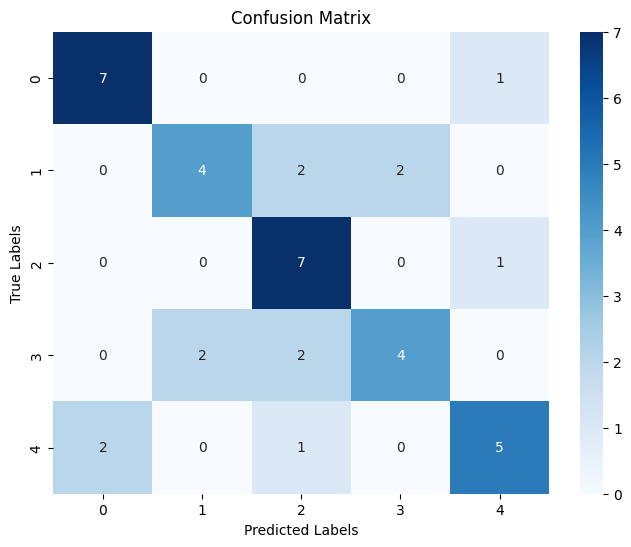

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Find indices of misclassified samples
y_test = y_test.values.ravel()
misclassified_indices = np.where(y_test != y_pred)[0]

# Display information for four misclassified samples
for i in range(min(4, len(misclassified_indices))):
    index = misclassified_indices[i]
    true_label = y_test[index]
    predicted_label = y_pred[index]

    print(f"Sample {index}: True Label = {true_label}, Predicted Label = {predicted_label}")


Sample 1: True Label = 0, Predicted Label = 4
Sample 5: True Label = 1, Predicted Label = 3
Sample 6: True Label = 1, Predicted Label = 3
Sample 7: True Label = 1, Predicted Label = 2


The model seems to be confusing 0=Ambient Music with 4=Classical Symphonic and 1=Country Music with 2=Heavy Metal and 3=Rock 'n Roll. Personally, I would say that Classical Symphonic and Ambient Music are more alike because they focus on harmony, while Country Music, Heavy Metal, and Rock 'n Roll are more passionate and focus on beats.

# FINAL MODEL TRAINING AND PREDICTION

In [30]:
# Create a pipeline with a scaler, PCA, and an SVM classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50)),
    ('svm', SVC(C=0.01, kernel='linear', decision_function_shape='ovo'))
])

# Fit the pipeline on the entire training data
pipeline.fit(train_data, train_labels.values.ravel())

# Make predictions on the test data
y_pred = pipeline.predict(test_data)
print(y_pred)

[3 4 2 0 0 4 1 1 4 0 4 3 3 2 1 2 2 1 1 4 1 4 1 2 4 3 0 3 0 4 1 1 1 0 1 4 4
 4 0 0]


In [28]:
# IMPORTANT: use 'id' and 'predicted' as the column names
test_submission = pd.DataFrame({
    'id':list(range(len(y_pred))),
    'predicted':list(y_pred.astype('int32'))})
print(test_submission.shape)
test_submission.head()

(40, 2)


,id,predicted
0,0,3
1,1,4
2,2,2
3,3,0
4,4,0


In [29]:
# submit the CSV file to the corresponding Kaggle competition.
test_submission.to_csv('SH1_0304_50_0.01.csv', index=False)

Kaggle result: accuracy = 0.8